# Probability prioject 2

* For best result please run the code in google colab enviroment in address below:

https://colab.research.google.com/drive/1sOgrisag9SH0YKXypA5aYPKdfkP6qFgU?usp=sharing



* if you want to run data in google colab platform please save a shortcut of this folder in your google drive:
https://drive.google.com/drive/folders/1IrJadirBgegaEzUEQD0RGN3xIz-U7M8D?usp=sharing

Writen by Aryan Zoroufi

Contact: aryan@zoroufi.com

Imports:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy.special import factorial

Define parameters of input data in a dict called "params":

1. Assigned linspace to data

2. Histogram array of data between -10 & 10 with 10 points between each 2 integer value(totally 200 bins)

3. max value of histogram vector of data

4. length of data

5. Sum of input data

6. Avrage of input data

7. Standard deviation of input data

In [ ]:
def parameters(data):
    hist, bin_edge = np.histogram(data, bins = 201, density = True,range=(-10,10))  #histogram vector of data
    x = np.linspace(-10, 10,num = 201)  #linspace between -10 and 10 with length of 201
    params = {
        'linspace' : x,
        'hist_vec' : hist,
        'max' : max(hist),
        'length' : data.shape[0],
        'sum' : np.sum(data),
        'avg' : np.mean(data),
        'sigma' : np.std(data)
    }
    return params

# Normal(Guassian) Distribution:

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)

miu : average

sigma: standard deviation

In [ ]:
def guassian(data, params):
    x = params['linspace']
    sigma = params['sigma']
    avg = params['avg']
    f = np.exp(-1/np.sqrt(2) * np.square((x - avg)/sigma)) / (np.sqrt(2 * np.pi) * sigma)
    f = f * params['max'] / np.max(f)
    model_params = {
        'sigma' : sigma,
        'miu' : avg
    }
    return f, model_params

# Exponential distribution:

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a693ce9cd1fcd15b0732ff5c5b8040c359cc9332)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/cb70cd5f0ecd70226fa8c17e9df78e351eaa7b02)


In [ ]:
def exponential(data, params):
    x = params['linspace'][101:]
    lambd = params['length'] / params['sum']
    f = lambd * np.exp(-lambd * x)
    f = f * params['max'] / np.max(f)
    zero_vec = np.zeros((1,101))[0]
    result = np.concatenate((zero_vec, f), axis = 0)
    model_params = {
        'lambda' : lambd,
    }
    return result, model_params

# Rayleigh Distribution

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/0d1c19c9c69e91d5c330cb23b34ee2a431ef8c2b)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/76ac981cd00297e54656a9fdf1579d25f905eca4)

In [ ]:
def rayleigh(data,params):
    x = params['linspace'][101:]
    max_val = params['max']
    m = params['length']
    sigma = np.sqrt(1/(2*m) * np.sum(data**2))
    f = x / np.square(sigma) * np.exp(-1/2 * np.square(x/sigma))
    f = f * max_val / np.max(f)
    zero_vec = np.zeros((1,101))[0]
    result = np.concatenate((zero_vec, f), axis = 0)
    model_params = {
        'sigma2' : np.square(sigma)
    }
    return result, model_params

# Laplace Distribution

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/210306e18c75c252ce85eb79c3af18bb5c8dd1a8)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1129c2bd7c57a9520827c012f263c465ae095df0)

In [ ]:
def laplace(data, params):
    x = params['linspace']
    max_val = params['max']
    b = 1 / (2 * max_val)
    f = 1/(2*b) * np.exp(-1/b * np.abs(x - np.mean(data)))
    f = f * params['max'] / np.max(f)
    model_params = {
        'miu' : np.mean(data),
        'b' : b
    }
    return f, model_params

# Uniform distribution

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b701524dbfea89ed90316dbc48c5b62954d7411c)


In [ ]:
def uniform(data, params):
    f = np.zeros((201))
    a = int((np.min(data) + 10) * 10)
    b = int((np.max(data) + 10) * 10)
    f[a:b] = 1 / (b-a)
    f = f * params['max'] / np.max(f)
    model_params = {
        'a' : a,
        'b' : b
    }
    return f, model_params

# Geometric distribution

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/0dcd47653aadb93e0eed01c13ce52819e5ef6c89)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/218314c20a565b7a8e28b2971af2ad03cfcab767)

In [ ]:
def geometric(data, params):
    x = np.linspace(0,10, num = 11)
    p = params['length'] / np.sum(data)
    f = np.power(1 - p, x - 1) * p
    f = f * np.max(params['hist_vec']) / np.max(f)
    result = np.zeros((1,201))[0]
    result[100::10] = f
    model_params = {
        'p' : p
    }
    return result, model_params

# Poisson distribution:

formula:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c22cb4461e100a6db5f815de1f44b1747f160048)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/4227bbed2a2ba86a54bc4fd5171e8cffa1f74dbd)

In [ ]:
def poisson(data, params):
    x = np.linspace(0,10, num = 11)
    n = data.shape[0]
    lambd = params['sum'] / params['length']
    f = np.power(lambd, x) * np.exp(-lambd) / factorial(x)
    f = f * params['max'] / np.max(f)
    result = np.zeros((1,201))[0]
    result[100::10] = f
    model_params = {
        'lambda' : lambd
    }
    return result, model_params

# Calculate mean square error between histogram of data and model to find error of model

In [ ]:
def ms_error(data, params, model):
    f,_  = model(data, params)
    hist = params['hist_vec']
    error = np.sum((hist - f)**2)
    return error

# Find the model with least mean-square error and name it as the best model

In [ ]:
def best_estimator(data, params):
    models = np.array([guassian, exponential,rayleigh,laplace,uniform,geometric,poisson])
    error = [ms_error(data, params, i) for i in models]
    a = error == np.min(error)
    best_model = models[error == np.min(error)][0]
    f, model_params = best_model(data, params)
    cache = {
        'model name' : best_model.__name__,
        'error' : np.min(error),
        'model_params' : model_params
    }
    return f, cache

# Import data

If you are not using Google Colab platform, please comment this cell and import the file from your PC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path  = '/content/drive/My Drive/Probability/Data8.mat'
init_data = scipy.io.loadmat(path)
data = init_data['data8'].flatten()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Main session

Find the best estimator using functions and fit it on data and print model name and model parameters

In [ ]:
params = parameters(data)
f, model = best_estimator(data, params)
print("best fitting model = " + model['model name'].format())
print("Mean Square Error = " + str(model['error']))
print("Model Parameters = " + str(model['model_params']))

best fitting model = poisson
Mean Square Error = 0.03596073733728766
Model Parameters = {'lambda': 1.1030927835051547}


# Plot the data and model in seperated figures

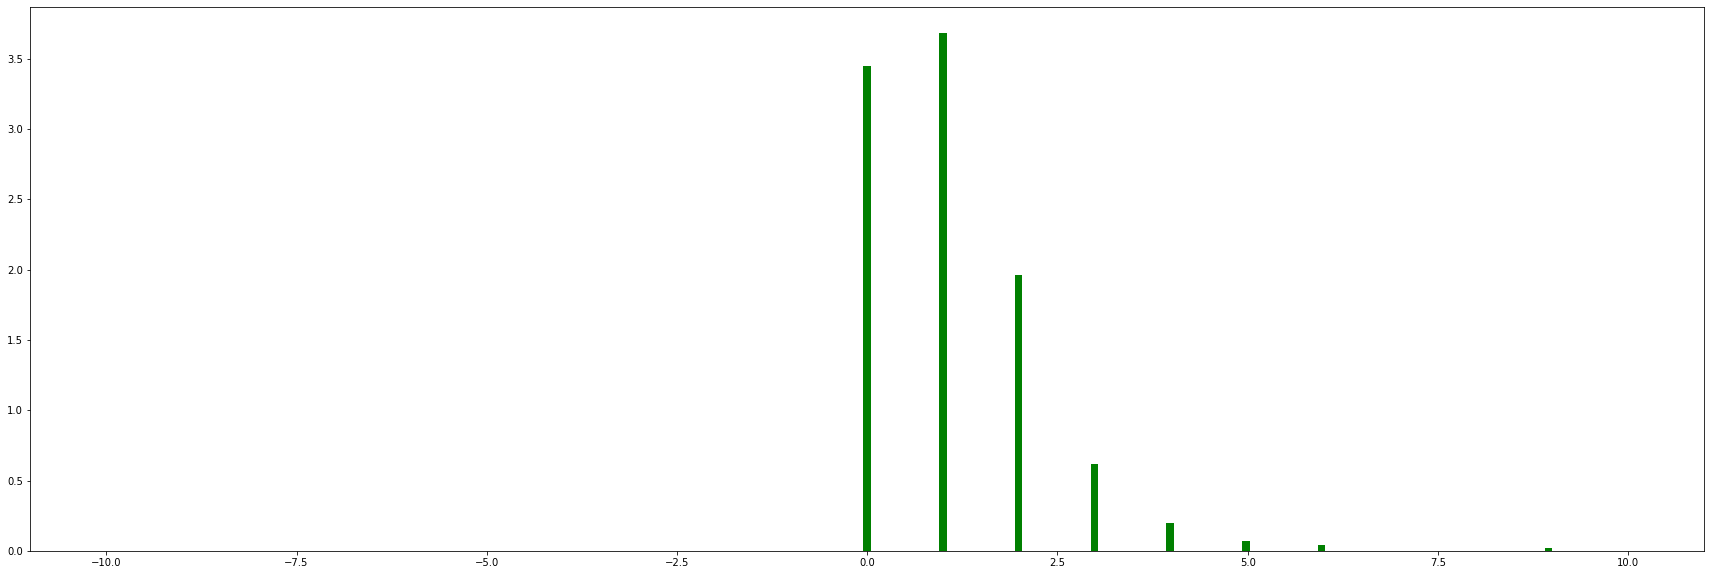

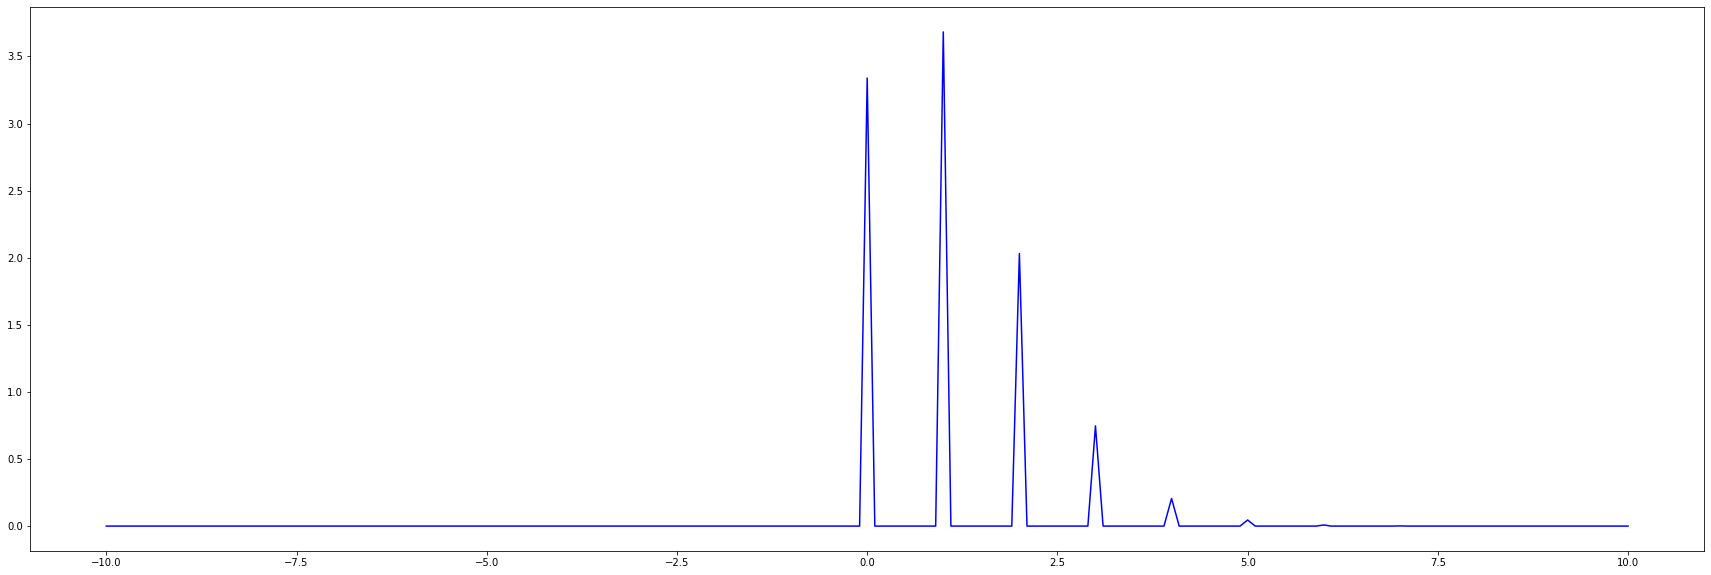

In [ ]:
plt.figure(figsize=(30,10))
x = params['linspace']
a = plt.hist(data,bins=201,range=(-10,10), density= True, color='g')
plt.figure(figsize=(30,10))
plt.plot(x,f,'b')

# Plot data and model in one figure

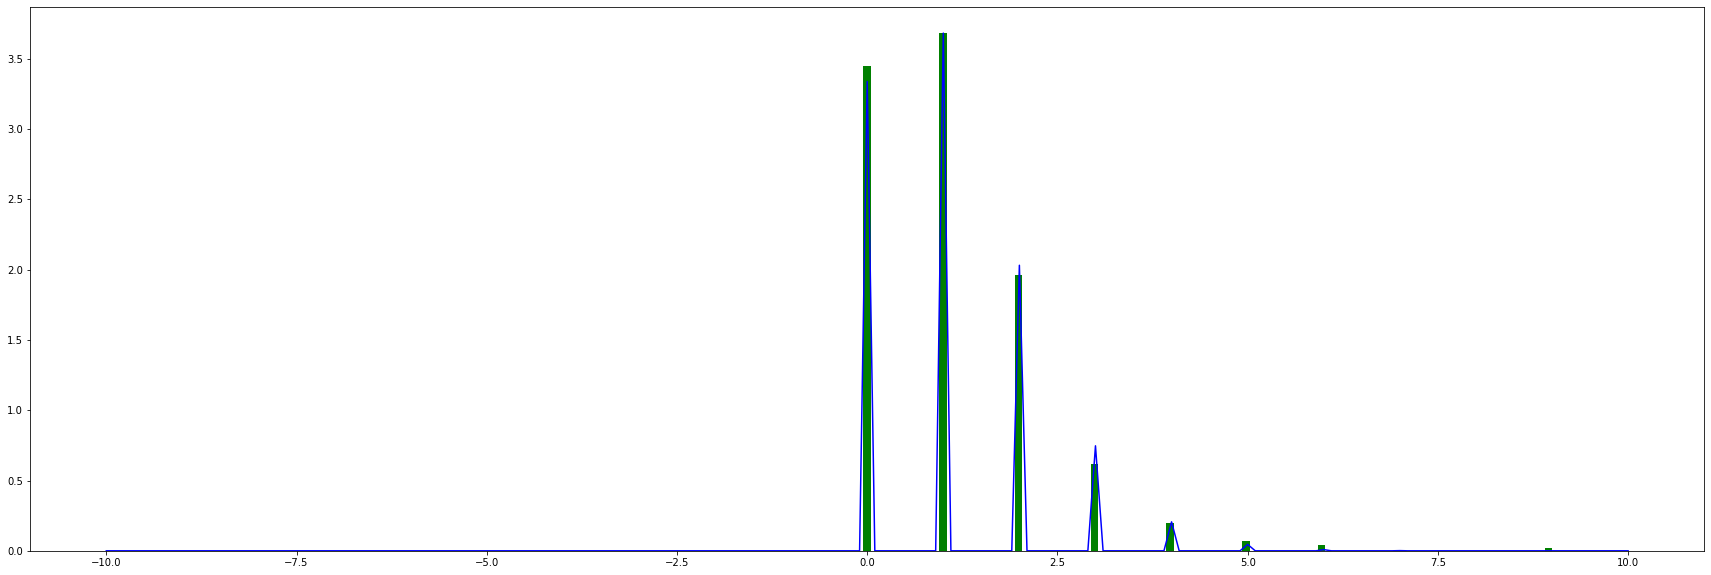

In [ ]:
plt.figure(figsize=(30,10))
x = params['linspace']
a = plt.hist(data,bins=201,range=(-10,10), density= True, color='g')
plt.plot(x,f,'b')